In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df=pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:xlabel='median_income', ylabel='Count'>

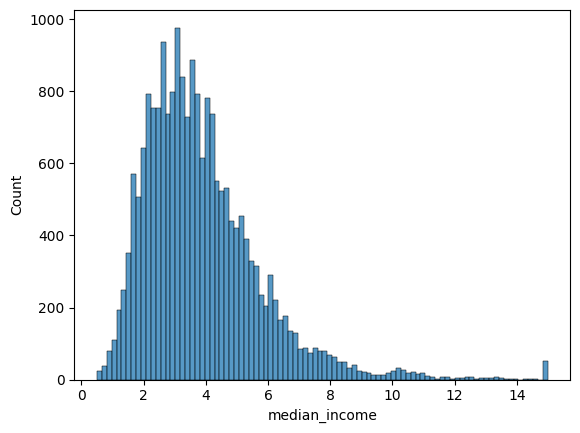

In [10]:
sns.histplot(df['median_income'])

In [11]:
df['income_category']=pd.cut(df['median_income'],bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5,])

<AxesSubplot:>

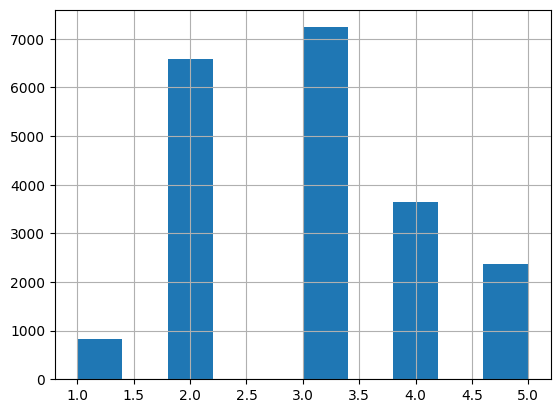

In [12]:
df['income_category'].hist()

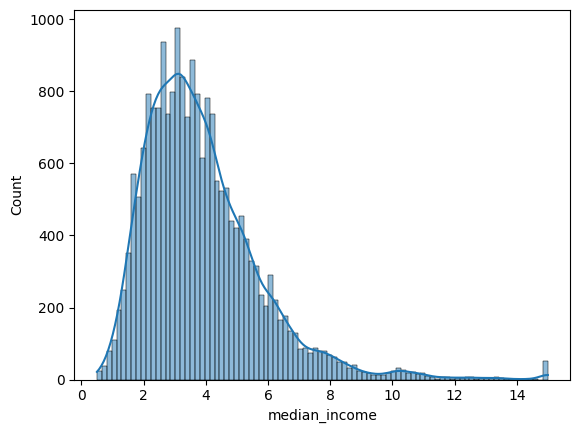

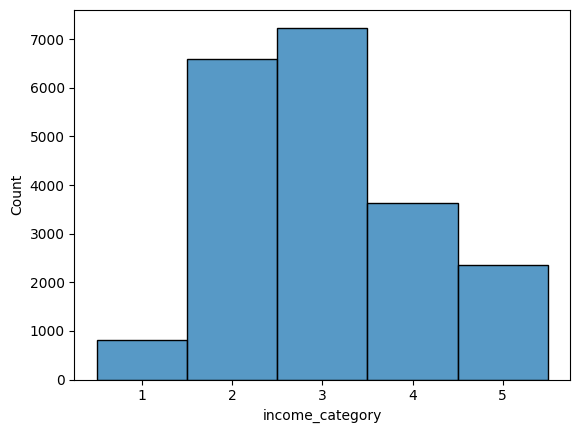

In [13]:
sns.histplot(df['median_income'],kde=True)
plt.show()
sns.histplot(df['income_category'])
plt.show()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=4)

gen=split.split(df,df['income_category'])

In [16]:
for i,j in gen:
    print(i,j)

[ 5096   149 13515 ... 20522  3115  9930] [17462  2975  6447 ... 12998 20612 13654]


In [17]:
train_df=df.loc[i]

In [18]:
test_df=df.loc[j]

In [20]:
from housing.config.configuration import Configuration


p = Configuration(
    '/home/admin/Desktop/project_task_extra/Project/Housing_Price_Prediction/config/config.yaml')

print(p.get_data_validation_config())

DataValidationConfig(schema_file_path='/home/admin/Desktop/project_task_extra/Project/Housing_Price_Prediction/notebook/config/schema.yaml', report_file_path='/home/admin/Desktop/project_task_extra/Project/Housing_Price_Prediction/notebook/housing/artifact/data_validation/2023-03-27-17-02/report.json', report_page_file_path='/home/admin/Desktop/project_task_extra/Project/Housing_Price_Prediction/notebook/housing/artifact/data_validation/2023-03-27-17-02/report.html')


In [26]:

import yaml
schema_dict = dict(zip(df.columns, df.dtypes.astype(str)))

# remove the "dtype(" prefix from the data types
schema_dict = {'columns': {k: v.replace('dtype(', '').replace(')', '') for k, v in schema_dict.items(
) if k != 'median_house_value'}, 'target_column': 'median_house_value', 'domain_value': {'ocean_proximity': list(df['ocean_proximity'].unique())}}

# create schema dictionary with only keys and data types
# schema = {k: type(v).__name__ for k,v in schema_dict.items()}

# write schema dictionary to a YAML file
with open('schema.yaml', 'w') as file:
    yaml.dump(schema_dict, file)